<a href="https://colab.research.google.com/github/EllieMwangi/Finscope-survey-data-EDA/blob/master/Finscope_Survey_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis of Finscope Survey Data


### 1. Defining the Question

#### a) Specifying the data analysis question

- Determine the state of financial inclusion in selected countries based on number of individuals with bank accounts
- Identify key demographic factors that influence whether an individual has a bank account or not.

#### b) Metrics of Success
Can successfully identify demographic variables that influence if an individual has a bank account or not.

#### c) Context
Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.


#### d) Recording Experimental Design
- Define research question
- Data Exploration
- Univariate analysis
- Bivariate Analysis
- Multivariate Analysis
- Summary of Findings
- Challenging the solution

#### e) Relevance of the data
The data used for analysis contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018 and is relevant for analysis.

### Data Exploration

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Set global parameters
sns.set()
plt.rcParams['figure.figsize'] = (10.0,8.0) 

%matplotlib inline

In [3]:
# Load dataset
finance_df = pd.read_csv('finacial_data.csv')

In [4]:
# Preview dataset
finance_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Sample 10 rows from the data
finance_df.sample(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
12788,Rwanda,2016,uniqueid_6721,No,Rural,Yes,1.0,75.0,Female,Head of Household,Widowed,No formal education,Government Dependent
10998,Rwanda,2016,uniqueid_4931,No,Urban,Yes,5.0,28.0,Female,Other non-relatives,Single/Never Married,Primary education,Informally employed
2883,Kenya,2018,uniqueid_2884,Yes,Rural,Yes,6.0,76.0,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
12292,Rwanda,2016,uniqueid_6225,No,Rural,Yes,3.0,27.0,Female,Spouse,Married/Living together,Primary education,Informally employed
18226,Tanzania,2017,uniqueid_3424,No,Rural,Yes,1.0,35.0,Male,Head of Household,Single/Never Married,Primary education,Informally employed
5202,Kenya,2018,uniqueid_5203,No,Rural,No,2.0,60.0,Female,Spouse,Married/Living together,No formal education,Farming and Fishing
17111,Tanzania,2017,uniqueid_2309,No,Urban,Yes,2.0,26.0,Male,Head of Household,Single/Never Married,Primary education,Self employed
16763,Tanzania,2017,uniqueid_1961,No,Urban,Yes,2.0,25.0,Female,Spouse,Single/Never Married,No formal education,Self employed
196,Kenya,2018,uniqueid_197,Yes,Urban,Yes,7.0,33.0,Female,Head of Household,Married/Living together,Primary education,Self employed
12062,Rwanda,2016,uniqueid_5995,Yes,Urban,Yes,6.0,55.0,Female,Spouse,Married/Living together,Primary education,Other Income


In [6]:
# Check for data types
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [7]:
# Shape of the data
finance_df.shape

(23524, 13)

In [8]:
# Check for duplicates
finance_df.duplicated().sum()


0

In [9]:
# Drop duplicates
finance_df.dropna(inplace=True)

In [10]:
# Check for unique values in each column
for col in finance_df.columns.to_list():
  print(f'{col} column unique values: \n')
  print(finance_df[col].unique(), end='\n')

country column unique values: 

['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
year column unique values: 

[2018 2029 2056 2016 2039 2017]
uniqueid column unique values: 

['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
Has a Bank account column unique values: 

['Yes' 'No']
Type of Location column unique values: 

['Rural' 'Urban']
Cell Phone Access column unique values: 

['Yes' 'No']
household_size column unique values: 

[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21.  0.
 18. 17. 20.]
Respondent Age column unique values: 

[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  93.  74.  88.  90.
  77.  84.  82.  89.  79.  83.  94.  87.  92.  91. 

- Dataset contains missing values in multiple columns.
- Outliers in year and the Level of education columns

In [11]:
# Investigate rows with incorrect years
finance_df[finance_df['year'].isin([2029,2056,2039])]

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
213,Kenya,2029,uniqueid_214,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
308,Kenya,2056,uniqueid_309,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
7014,Rwanda,2039,uniqueid_947,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [12]:
# Drop erroneous year data
err_years = finance_df[finance_df['year'].isin([2029,2056,2039])].index
finance_df.drop(index=err_years, inplace=True)

In [13]:
# Investigate rows with incorrect education data
finance_df[finance_df['Level of Educuation']=='6']

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
6867,Rwanda,2016,uniqueid_800,No,Rural,No,5.0,34.0,Female,Spouse,Married/Living together,6,Informally employed
7937,Rwanda,2016,uniqueid_1870,No,Rural,No,8.0,31.0,Female,Spouse,Married/Living together,6,Informally employed
8226,Rwanda,2016,uniqueid_2159,No,Rural,No,2.0,80.0,Male,Head of Household,Married/Living together,6,Informally employed
8453,Rwanda,2016,uniqueid_2386,No,Urban,Yes,3.0,36.0,Female,Head of Household,Divorced/Seperated,6,Informally employed
8778,Rwanda,2016,uniqueid_2711,No,Rural,Yes,4.0,44.0,Male,Head of Household,Married/Living together,6,Informally employed
9269,Rwanda,2016,uniqueid_3202,Yes,Urban,Yes,2.0,70.0,Female,Head of Household,Widowed,6,Remittance Dependent
9878,Rwanda,2016,uniqueid_3811,No,Rural,No,2.0,48.0,Female,Spouse,Married/Living together,6,Formally employed Private
9944,Rwanda,2016,uniqueid_3877,Yes,Urban,Yes,3.0,38.0,Male,Head of Household,Married/Living together,6,Informally employed
10560,Rwanda,2016,uniqueid_4493,No,Rural,Yes,6.0,48.0,Female,Spouse,Married/Living together,6,Informally employed
10767,Rwanda,2016,uniqueid_4700,No,Rural,No,2.0,63.0,Female,Head of Household,Divorced/Seperated,6,Informally employed


In [14]:
# Drop erroneous education data
err_education = finance_df[finance_df['Level of Educuation']== '6'].index
finance_df.drop(index=err_education, inplace=True)

In [15]:
# Check for missing values
finance_df.isnull().sum().sort_values(ascending=False)

Type of Job               0
Level of Educuation       0
marital_status            0
The relathip with head    0
gender_of_respondent      0
Respondent Age            0
household_size            0
Cell Phone Access         0
Type of Location          0
Has a Bank account        0
uniqueid                  0
year                      0
country                   0
dtype: int64

In [16]:
# Drop any null values
finance_df.dropna(inplace=True)

In [17]:
# Drop id column
finance_df.drop(columns='uniqueid', inplace=True)

### Univariate Analysis


In [58]:
# Get proportion of individuals with or without bank accounts
finance_df['Has a Bank account'].value_counts(normalize=True)*100

No     85.883413
Yes    14.116587
Name: Has a Bank account, dtype: float64

In [18]:
# Describe numerical variables
finance_df[['household_size','Respondent Age']].describe()

,household_size,Respondent Age
count,23313.000000,23313.000000
mean,3.688414,38.793549
std,2.280842,16.510611
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


Text(0.5, 1.0, 'Respondent age distribution')

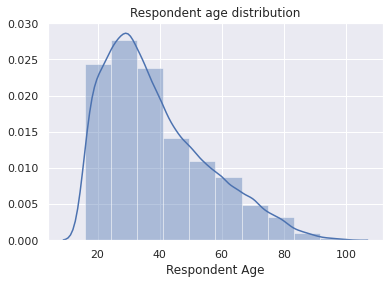

In [19]:
# Plot respondent age 
sns.distplot(finance_df['Respondent Age'], bins=10)
plt.title('Respondent age distribution')

In [20]:
finance_df['Respondent Age'].skew()

0.8412764239448531

The age variable is moderately positively skewed.

In [21]:
# Check for outliers
finance_df['Respondent Age'].kurt()

0.10122691422605756

The data is platykurtic, no outliers

Text(0.5, 1.0, 'Household Size Distribution')

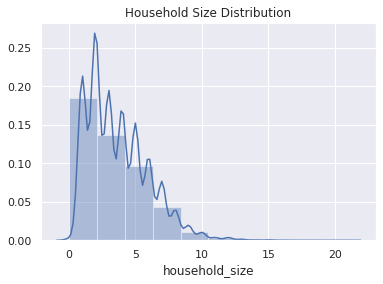

In [22]:
# Plot respondent age 
sns.distplot(finance_df['household_size'], bins=10)
plt.title('Household Size Distribution')

In [23]:
# Check for skewness
finance_df['household_size'].skew()

0.9737983207814955

In [24]:
# Check for kurtosis
finance_df['household_size'].kurt()

1.1530073057375057

Household variable has a moderate positive skewness. Values range mostly between 0 and 5. The distribution is also platykurtic thus no outliers.

In [25]:
# Check for outliers
num_financial = finance_df[['household_size','Respondent Age']]
Q1 = num_financial.quantile(0.25)
Q3 = num_financial.quantile(0.75)
IQR = Q3 -Q1

In [26]:
# Get rows with outliers
outliers = num_financial[(num_financial < (Q1 - 1.5 * IQR))|(num_financial > (Q3 + 1.5 * IQR))].any(axis=1)
index = outliers[outliers.values == True].index
finance_df[finance_df.index.isin(index)]

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
34,Kenya,2018,No,Rural,Yes,10.0,42.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
58,Kenya,2018,No,Rural,Yes,11.0,21.0,Male,Child,Single/Never Married,Other/Dont know/RTA,Informally employed
92,Kenya,2018,Yes,Urban,Yes,10.0,21.0,Female,Parent,Single/Never Married,Tertiary education,Remittance Dependent
100,Kenya,2018,No,Urban,Yes,10.0,23.0,Female,Other relative,Divorced/Seperated,Primary education,Formally employed Private
209,Kenya,2018,No,Rural,No,3.0,95.0,Female,Parent,Widowed,No formal education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23461,Uganda,2018,No,Urban,Yes,13.0,25.0,Female,Spouse,Married/Living together,Primary education,Dont Know/Refuse to answer
23468,Uganda,2018,No,Urban,Yes,12.0,42.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23471,Uganda,2018,No,Rural,Yes,15.0,17.0,Female,Other relative,Married/Living together,Secondary education,Self employed
23482,Uganda,2018,No,Rural,No,10.0,18.0,Female,Parent,Married/Living together,Secondary education,Self employed


- Data considered outliers using the interquantile range method seems feasible and thus will not be dropped

In [27]:
# Get frequency distributions for categorical variables
cat_financial = finance_df.select_dtypes(include='object').columns.to_list()
for col in cat_financial:
  print(f'Column: {col}')
  print(finance_df[col].value_counts().sort_values(ascending=False))
  print('**********')
  print('\n')

Column: country
Rwanda      8665
Tanzania    6497
Kenya       6062
Uganda      2089
Name: country, dtype: int64
**********


Column: Has a Bank account
No     20022
Yes     3291
Name: Has a Bank account, dtype: int64
**********


Column: Type of Location
Rural    14247
Urban     9066
Name: Type of Location, dtype: int64
**********


Column: Cell Phone Access
Yes    17315
No      5998
Name: Cell Phone Access, dtype: int64
**********


Column: gender_of_respondent
Female    13748
Male       9565
Name: gender_of_respondent, dtype: int64
**********


Column: The relathip with head
Head of Household      12714
Spouse                  6459
Child                   2221
Parent                  1069
Other relative           661
Other non-relatives      189
Name: The relathip with head, dtype: int64
**********


Column: marital_status
Married/Living together    10682
Single/Never Married        7899
Widowed                     2677
Divorced/Seperated          2047
Dont know                      

### Bivariate Analysis

Text(0.5, 1.0, 'Respondent Age vs Household Size')

<Figure size 864x720 with 0 Axes>

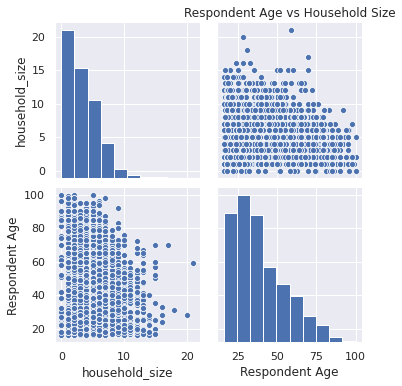

In [28]:
# Determine correlation between numeric features
plt.figure(figsize=(12,10))
sns.pairplot(finance_df[['household_size','Respondent Age']])
plt.title('Respondent Age vs Household Size')

In [29]:
finance_df['Respondent Age'].corr(finance_df['household_size'])

-0.11918485538538871

From the scatter plot and pearsons correlation, there is very weak negative correlation between respondent age and household size

In [30]:
# Investigate relationship between type of job and if the respondent has a bank account or not
table_job = pd.crosstab(finance_df['Has a Bank account'], finance_df['Type of Job'])
table_job

Type of Job,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
Has a Bank account,,,,,,,,,,
No,111,4788,87,480,197,5096,602,881,2267,5513
Yes,14,634,299,566,49,438,13,195,239,844


To test relationship between type of job and if the respondent has a bank account or not.

- Null Hypothesis : Type of job has no influence on if an individual has a bank account or not
- Alternative Hypothesis : Type of job influences on if an individual has a bank account or not

In [31]:
# Perform chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(table_job.to_numpy())

#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)

print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p: .5f}')

Propability: 0.95, Critical value: 16.918977604620448, Test statistic: 3001.462721258616
Alpha: 0.050000000000000044, p-value:  0.00000


p-value less than alpha, thus significant evidence to reject null hypothesis

In [32]:
# Investigate relationship between level of education and if the respondent has a bank account or not
table_edu = pd.crosstab(finance_df['Has a Bank account'], finance_df['Level of Educuation'])
table_edu

Level of Educuation,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
Has a Bank account,,,,,,
No,4291,2,11605,3225,554,345
Yes,176,6,1083,981,589,456


The number of respondents with no bank account and other education level is 2, hence it's not possible to perform the chi-square test as it requires at least 5 per cell

In [33]:
# Investigate relationship between type of location and if the respondent has a bank account or not
table_loc = pd.crosstab(finance_df['Has a Bank account'], finance_df['Type of Location'])
table_loc

Type of Location,Rural,Urban
Has a Bank account,,
No,12586,7436
Yes,1661,1630


To test relationship between type of location and if the respondent has a bank account or not.

- Null Hypothesis : Type of location does not influence if an individual has a bank account or not
- Alternative Hypothesis : Type of location influences if an individual has a bank account or not

In [34]:
stat, p, dof, expected = chi2_contingency(table_loc.to_numpy())

#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)

print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p:.5f}')

Propability: 0.95, Critical value: 3.841458820694124, Test statistic: 182.04842311728328
Alpha: 0.050000000000000044, p-value: 0.00000


p-value less than alpha, thus significant evidence to reject null hypothesis

In [35]:
# Investigate relationship between cell phone access and if the respondent has a bank account or not
table_cell = pd.crosstab(finance_df['Has a Bank account'], finance_df['Cell Phone Access'])
table_cell

Cell Phone Access,No,Yes
Has a Bank account,,
No,5894,14128
Yes,104,3187


To test relationship between cell phone access and if the respondent has a bank account or not.

- Null Hypothesis : Cell phone access has no influence on if an individual has a bank account or not
- Alternative Hypothesis : Cell phone access has influence on if an individual has a bank account or not

In [36]:
stat, p, dof, expected = chi2_contingency(table_cell.to_numpy())

#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)

print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Propability: 0.95, Critical value: 3.841458820694124, Test statistic: 1019.9695325610875
Alpha: 0.050000000000000044, p-value: 8.196941932584429e-224


p-value less than alpha, thus significant evidence to reject null hypothesis

In [37]:
# Investigate relationship between gender and if the respondent has a bank account or not
table_gender = pd.crosstab(finance_df['Has a Bank account'], finance_df['gender_of_respondent'])
table_gender

gender_of_respondent,Female,Male
Has a Bank account,,
No,12271,7751
Yes,1477,1814


To test relationship between gender and if the respondent has a bank account or not.

- Null Hypothesis : Gender has no influence if an individual has a bank account or not
- Alternative Hypothesis : Gender influences if an individual has a bank account or not

In [38]:
stat, p, dof, expected = chi2_contingency(table_gender.to_numpy())

#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)

print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Propability: 0.95, Critical value: 3.841458820694124, Test statistic: 313.80694734870315
Alpha: 0.050000000000000044, p-value: 3.2353619819376854e-70


p-value less than alpha, thus significant evidence to reject null hypothesis

Investigate relationship between respondent age and if the respondent has a bank account or not.

- H0: Respondent age does not influence if a respondent has a bank account or not
- H1: Respondent age if a respondent has a bank account or not

In [39]:
 # Sample 50 rows from financial data
 rand_sample = finance_df[['Respondent Age', 'Has a Bank account']].sample(n=50, random_state=1)


In [40]:
# Perform a two sample z test
from statsmodels.stats.weightstats import ztest

zscore, p = ztest(x1 = rand_sample[rand_sample['Has a Bank account']=='Yes']['Respondent Age'].values, x2=rand_sample[rand_sample['Has a Bank account']=='No']['Respondent Age'].values)
print(f'Test statistic: {zscore}, p-value: {p}')

Test statistic: -0.46472550427617443, p-value: 0.6421280417379002


P-value is greater than significance level of 0.05, hence we fail to reject the null hypothesis.


Investigate relationship between household size and if the respondent has a bank account or not.

- H0: Household size does not influence if a respondent has a bank account or not
- H1: Household size influences if a respondent has a bank account or not

In [41]:
 rand_sample_2 = finance_df[['household_size', 'Has a Bank account']].sample(n=50, random_state=1)
 zscore, p = ztest(x1 = rand_sample_2[rand_sample_2['Has a Bank account']=='Yes']['household_size'].values, x2=rand_sample_2[rand_sample_2['Has a Bank account']=='No']['household_size'].values)
print(f'Test statistic: {zscore}, p-value: {p}')


Test statistic: -1.0379338770688056, p-value: 0.29930084036376947


P-value is greater than significance level of 0.05, hence we fail to reject the null hypothesis.


In [42]:
finance_df.groupby('Has a Bank account')['gender_of_respondent'].value_counts()

Has a Bank account  gender_of_respondent
No                  Female                  12271
                    Male                     7751
Yes                 Male                     1814
                    Female                   1477
Name: gender_of_respondent, dtype: int64

Text(0.5, 0, 'Has a bank account')

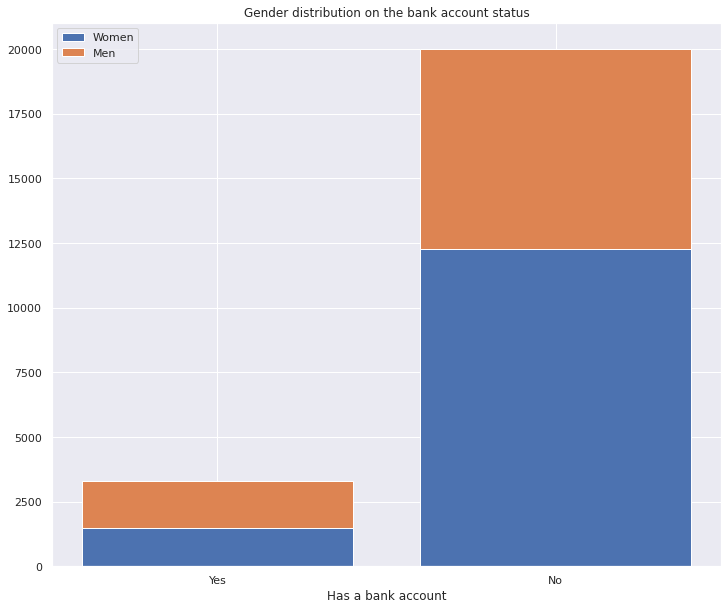

In [43]:
bank_status = ['Yes', 'No']
women_number = [1477, 12271]
men_number = [1814, 7751]
x = [status for status in bank_status]
plt.figure(figsize=(12,10))
plt.bar(x, women_number, label='Women')
plt.bar(x, men_number, label='Men', bottom=women_number)
plt.title('Gender distribution on the bank account status')
plt.legend()
plt.xlabel('Has a bank account')

The data is heavily imbalanced as depicted with most data points belonging to respondents with no bank account. A significantly larger percentage of women have no bank accounts


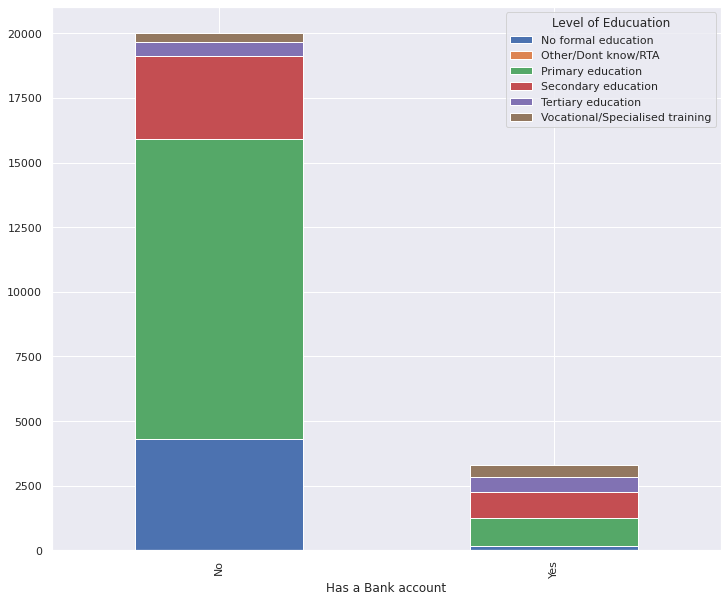

In [44]:
pd.crosstab(finance_df['Has a Bank account'], finance_df['Level of Educuation']).plot(kind='bar', stacked=True, figsize=(12,10))

The biggest percentage of individuals with no bank account as well as individuals with a bank account have a primary education.

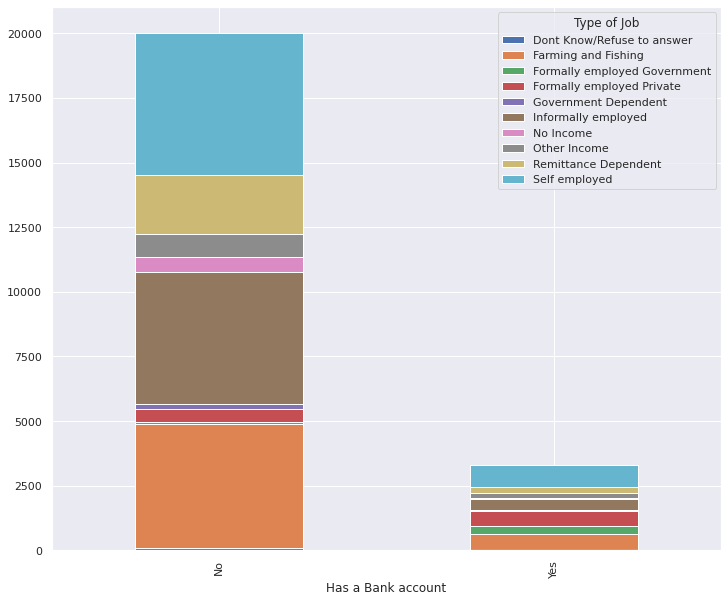

In [45]:
pd.crosstab(finance_df['Has a Bank account'], finance_df['Type of Job']).plot(kind='bar',stacked=True, figsize=(12,10))

Majority of individuals with a bank account are either self employed, have a formal private employment or participate in farming and fishing. Largest percentage of individuals with no bank account are self employed.

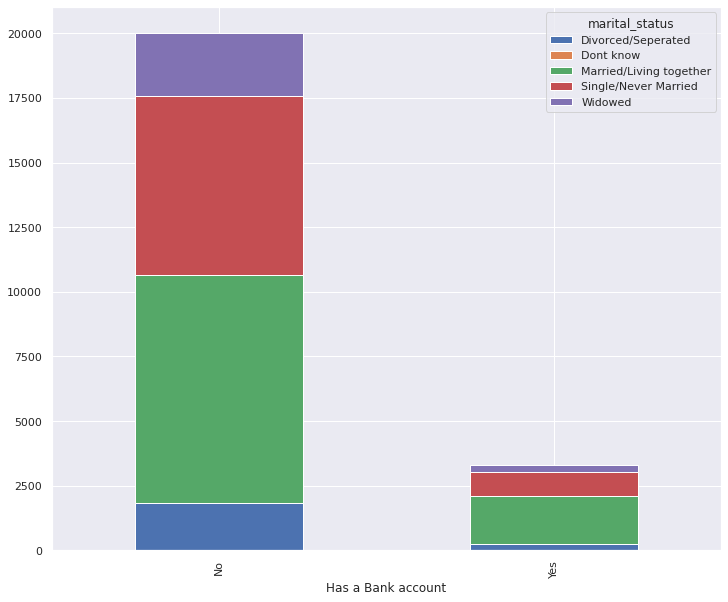

In [46]:
pd.crosstab(finance_df['Has a Bank account'], finance_df['marital_status']).plot(kind='bar', stacked=True, figsize=(12,10))

The largest percentage of individuals with bank accounts and without bank accounts are married/living together.

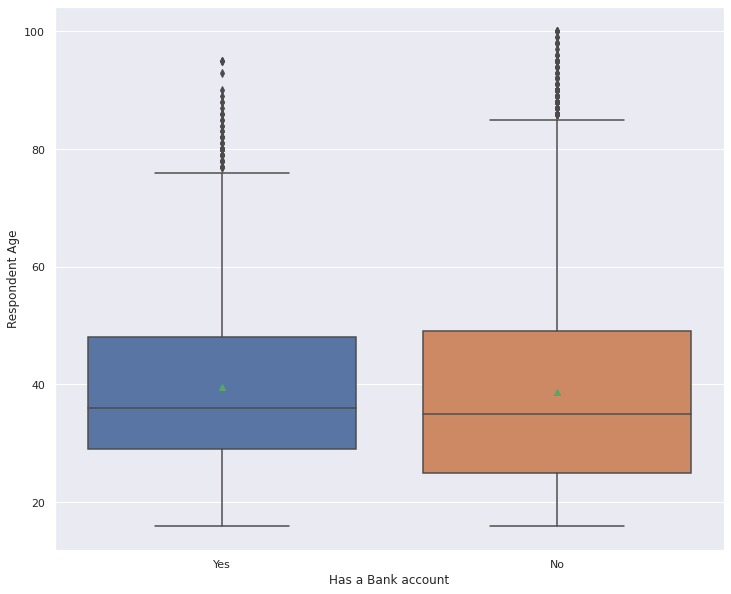

In [47]:
plt.figure(figsize=(12,10))
sns.boxplot(x = 'Has a Bank account', y = 'Respondent Age', data=finance_df,showmeans=True)

The distribution of ages is relatively similar for both categories. However the respondents with no bank accounts have a higher maximum age.

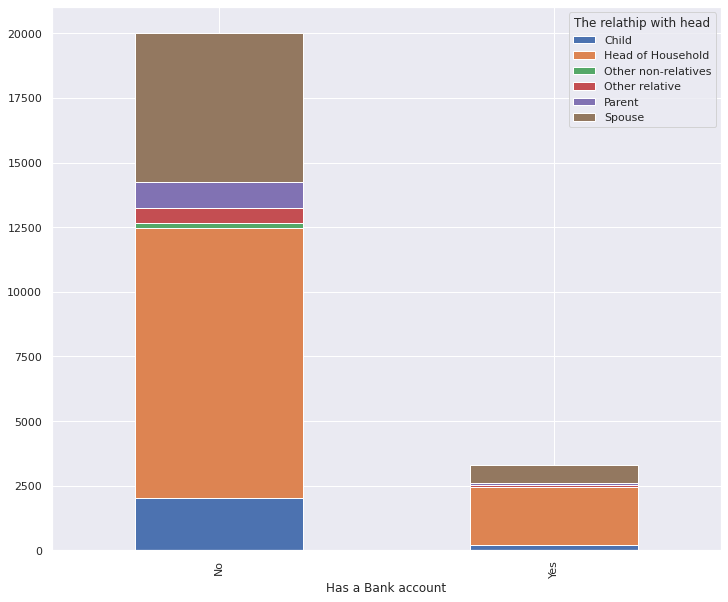

In [48]:
pd.crosstab(finance_df['Has a Bank account'], finance_df['The relathip with head']).plot(kind='bar', stacked=True, figsize=(12,10))

Majority of respondents with a bank account as well as without a bank account are heads of hoseholds

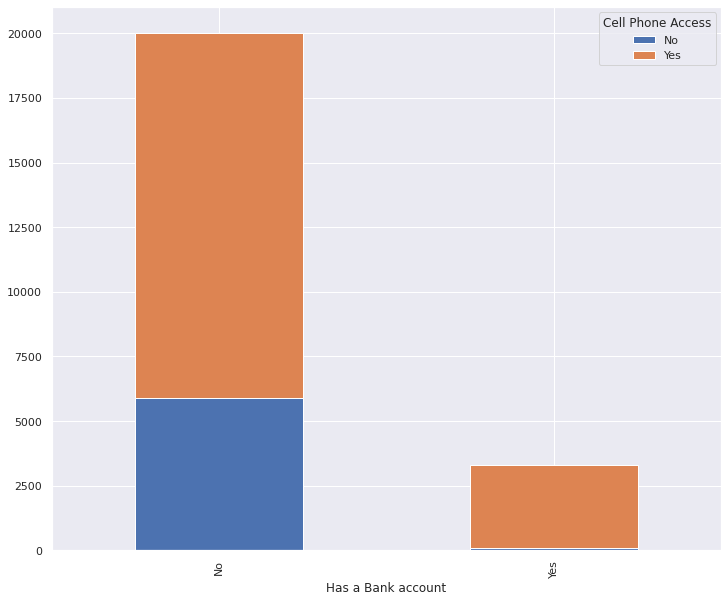

In [87]:
pd.crosstab(finance_df['Has a Bank account'], finance_df['Cell Phone Access']).plot(kind='bar', stacked=True, figsize=(12,10))

A large percentage (nearly the whole population) of respondents with bank accounts have cell phone access.

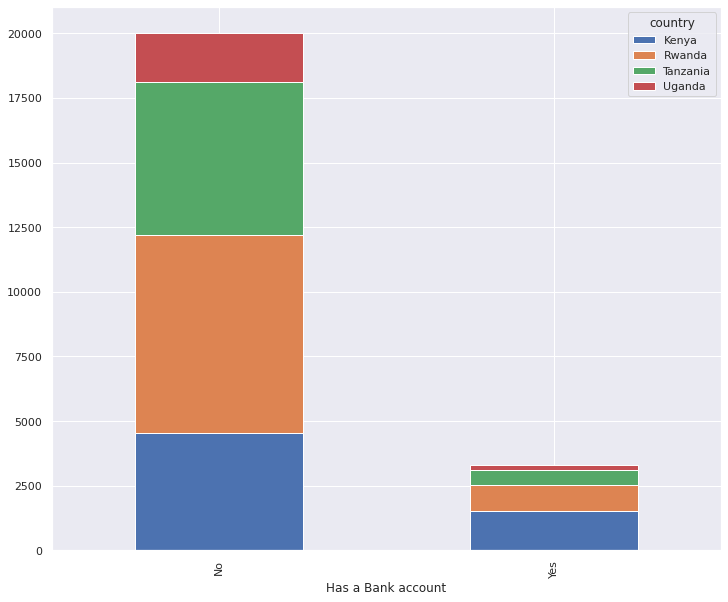

In [49]:
pd.crosstab(finance_df['Has a Bank account'], finance_df['country']).plot(kind='bar', stacked=True, figsize=(12,10))

The largest number of respondents with bank accounts are from Kenya, followed by those from Rwanda 

### Multivariate Analysis

Text(0.5, 1.0, 'Respondents with bank accounts')

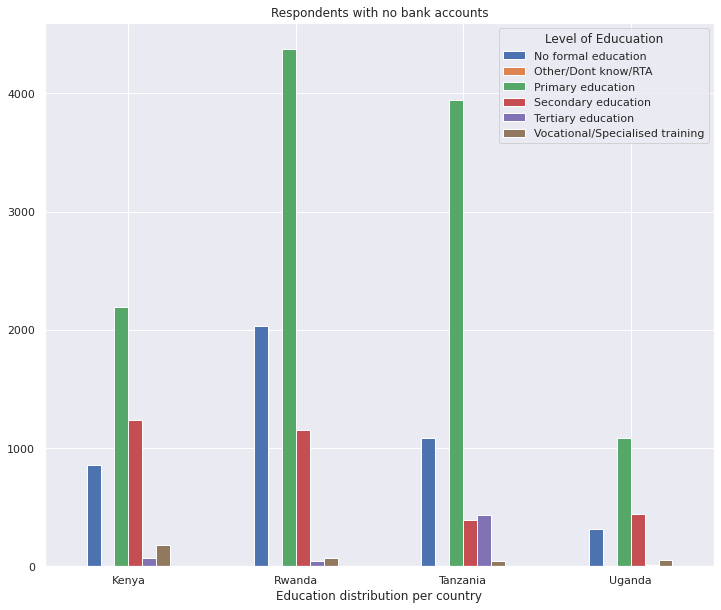

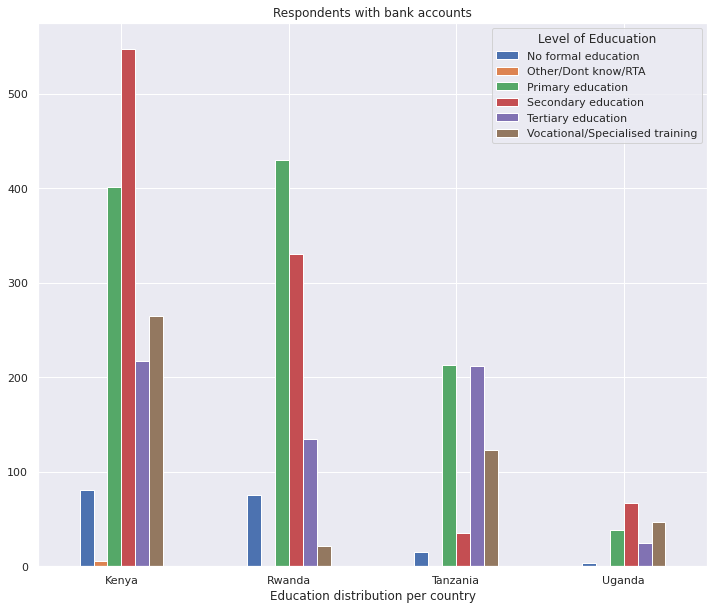

In [80]:
# Investigate relationship between country, level of education and bank account status
country_edu = pd.crosstab(index=[finance_df['Has a Bank account'],finance_df['country']], columns=finance_df['Level of Educuation'])

country_edu.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1,2,3], labels=['Kenya','Rwanda','Tanzania','Uganda'], rotation=0)
plt.xlabel('Education distribution per country')
plt.title('Respondents with no bank accounts')

country_edu.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1,2,3], labels=['Kenya','Rwanda','Tanzania','Uganda'], rotation=0)
plt.xlabel('Education distribution per country')
plt.title('Respondents with bank accounts')

For each country, the level of education with the highest number of respondents with bank accounts:
- Kenya : Secondary Education
- Rwanda : Primary education
- Tanzania : Primary/Tertiary Education
- Uganda : Secondary education

In all countries, the level of education with the highest number of respondents with no bank accounts is primary education.

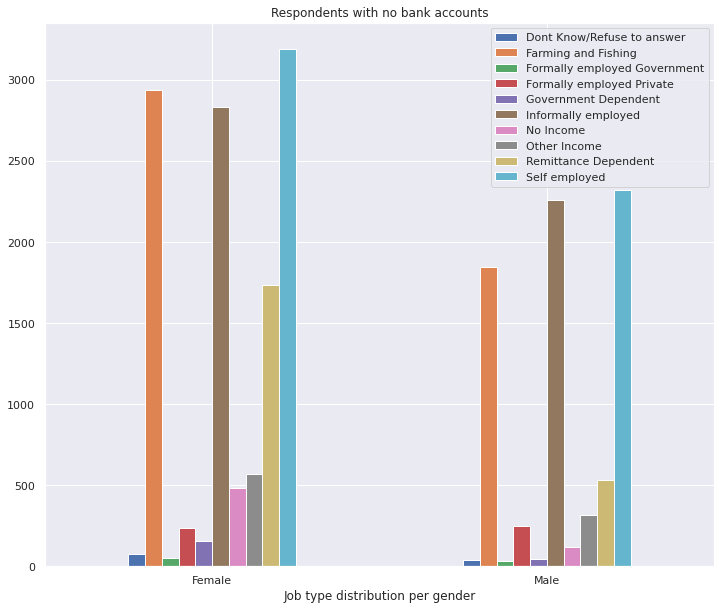

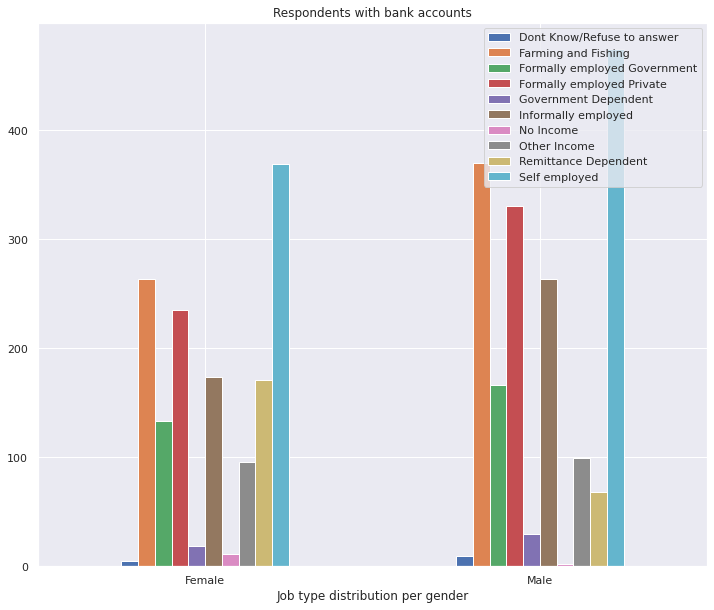

In [85]:
# Investigate relationship between gender, type of jon and bank account status
gender_job = pd.crosstab(index=[finance_df['Has a Bank account'],finance_df['gender_of_respondent']], columns=finance_df['Type of Job'])

gender_job.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Female', 'Male'], rotation=0)
plt.xlabel('Job type distribution per gender')
plt.title('Respondents with no bank accounts')
plt.legend(loc='upper right')

gender_job.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Female', 'Male'], rotation=0)
plt.xlabel('Job type distribution per gender')
plt.title('Respondents with bank accounts')
plt.legend(loc='upper right')

For both women and men, the highest propotion of respondents with the following types of jobs have bank accounts:
- Self employed
- Farming and fishing
- Formally employed private
- Informally employed

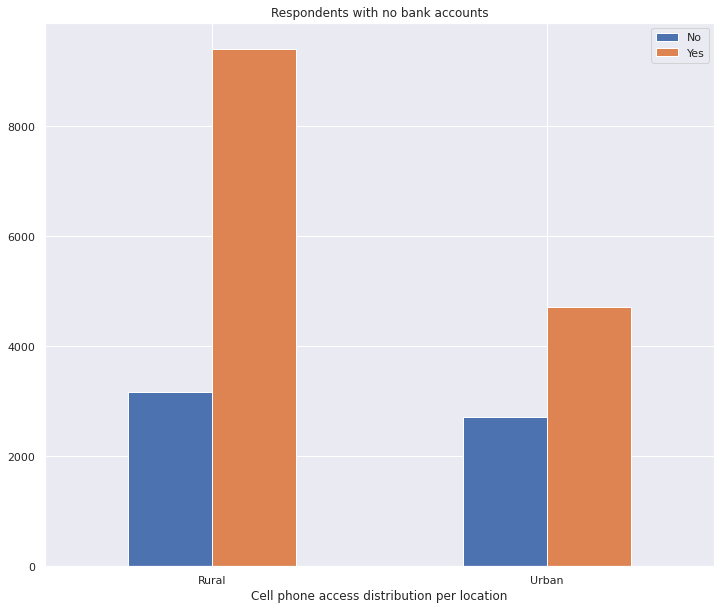

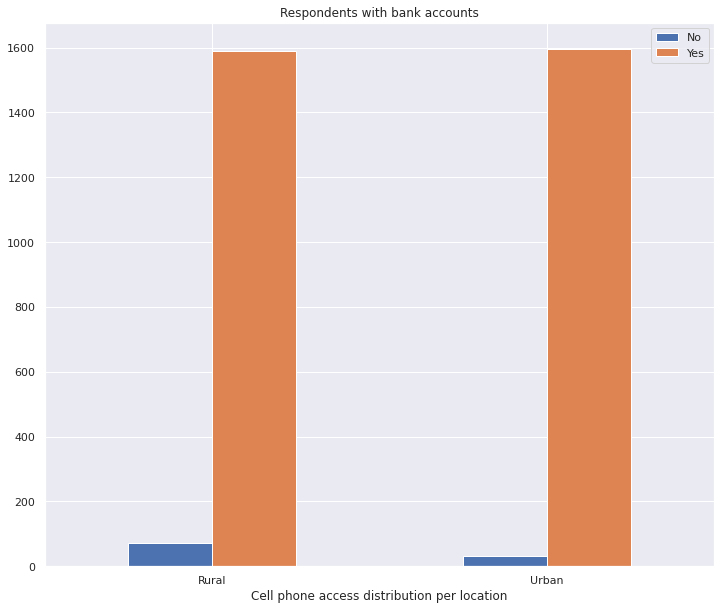

In [86]:
# Investigate relationship between cell access, location and bank account status
loc_cell = pd.crosstab(index=[finance_df['Has a Bank account'],finance_df['Type of Location']], columns=finance_df['Cell Phone Access'])

loc_cell.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Rural','Urban'], rotation=0)
plt.xlabel('Cell phone access distribution per location')
plt.title('Respondents with no bank accounts')
plt.legend(loc='upper right')

loc_cell.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Rural','Urban'], rotation=0)
plt.xlabel('Cell phone access distribution per location')
plt.title('Respondents with bank accounts')
plt.legend(loc='upper right')

Access to a cell phone is relatively the same for individuals with bank accounts regardless on location

In [50]:
# Encode categorical features
feature_df = finance_df.drop('Has a Bank account', axis=1)

#Convert year variable to object
feature_df['year'] = feature_df['year'].astype('object')

feature_df = pd.get_dummies(feature_df, columns=(feature_df.select_dtypes(include='object').columns.to_list()),dtype=np.int64)

In [51]:
feature_df.head()

,household_size,Respondent Age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,year_2016,year_2017,year_2018,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,The relathip with head_Child,The relathip with head_Head of Household,The relathip with head_Other non-relatives,The relathip with head_Other relative,The relathip with head_Parent,The relathip with head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level of Educuation_No formal education,Level of Educuation_Other/Dont know/RTA,Level of Educuation_Primary education,Level of Educuation_Secondary education,Level of Educuation_Tertiary education,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,3.0,24.0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,5.0,70.0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5.0,26.0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,5.0,34.0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,8.0,26.0,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [52]:
from sklearn.preprocessing import LabelBinarizer
Y = finance_df['Has a Bank account']
print(Y.head())
Y = LabelBinarizer().fit_transform(Y)
print(Y[:5])

0    Yes
1     No
2    Yes
3     No
4     No
Name: Has a Bank account, dtype: object
[[1]
 [0]
 [1]
 [0]
 [0]]


In [53]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler
num_features = feature_df[['household_size','Respondent Age']]

scaler = StandardScaler().fit(num_features)

In [54]:
# Split data into test and train sets, set test set to 30% of total data
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(feature_df, Y, test_size=.3, random_state=42)

In [55]:
scaled_x_train = scaler.transform(x_train[['household_size','Respondent Age']])
scaled_x_test = scaler.transform(x_test[['household_size','Respondent Age']])

In [56]:
x_train = np.concatenate((scaled_x_train, x_train.iloc[:, 2:]), axis=1)
x_test = np.concatenate((scaled_x_test, x_test.iloc[:, 2:]), axis=1)

#### Principal Component Features


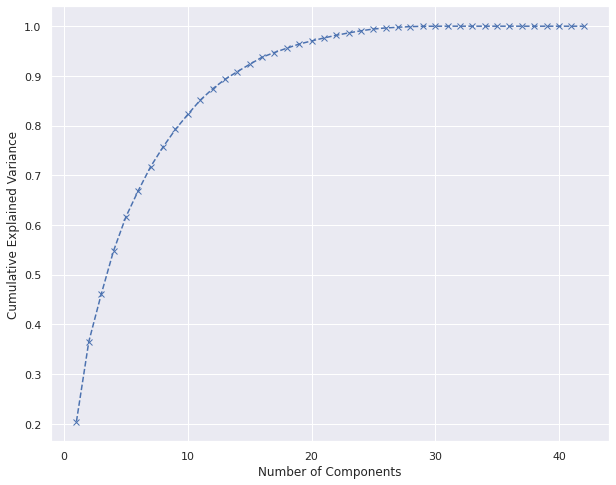

In [57]:
from sklearn.decomposition import PCA
pca = PCA(random_state=0)
pca.fit(x_train)

# getting the explained variance ratio
evr = pca.explained_variance_ratio_
range_length = len(evr) + 1

# plotting the explained variance ratio so we can determine how any principal components to keep
plt.figure(figsize = (10, 8))
plt.plot(__builtin__.range(1, range_length), evr.cumsum(), marker = 'x', linestyle = '--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

10 components explain over 80% of the variance in our dataset

### Summary of Findings

The proportion of individuals with no bank accounts is extremely high in comparison to those with that have a bank account. 85% of all respondents have no bank accounts.

The categorical demographic factors such as gender, job type, location as well as accesss to a cellphone having a significant impact on whether an individual has an account or not.

Dimension reduction with PCA recommends 10 components. This would be extremely helpful as the data is highly categorical.

### Challenging the solution

To provide further insight on relationships between features:

 - Perform further multivariate analysis among features
 - ANOVA analysis